# On the applicability of Bisection, Regula Falsi and Newton-Raphson methods for root finding.

    Name: Beltran Sajonia-Coburgo-Gotha
    ID: 170449861
    Due date: Sunday 21 October, 11:59 pm
    Last update: Suday 21 October, 01:33 pm

### Introduction

This report aims to explore, on a more fundamental level, the results obtained throughout Labs 1-6 in which we explored different root finding methods (Bisection,Regula Falsi and Newton Rhapson), and an introduciton to how computers store and process numbers. Since the code has been explained to and checked by demonstrators there will be limited discussion on the code itself and instead focus on the implications of the methods.

### Bisection Method

The Bisection method assumes $f(x)$ to be continuous in the interval $[a,b]$ such that if $f(a)\cdot f(b)<0$ there is a value of $a<r<b$ for which $f(r)=0$. Thus, we define the midpoint, $c$, between $a$ and $b$ as $c=\frac{a+b}{2}$. We then evaluate the product $f(a)\cdot f(c)$ to see whether or not there is a root in this interval. By repeated evaluation of this product we can narrow on the value of $r$.

In [7]:
def bisection_step(f, bounds): #bounds given as a tuple, extracted in the following line
    a, b = bounds      
    c = (a + b)/2 
    if (f(a)*f(c))<0: #"If f(a) and f(c) have opposite sign, i.e, there is a root between a and c, return a and c
        return (a,c)
    else:
        return (c,b) #Otherwise, return c and d as a root lies within the interval [c,b]

<IPython.core.display.Javascript object>


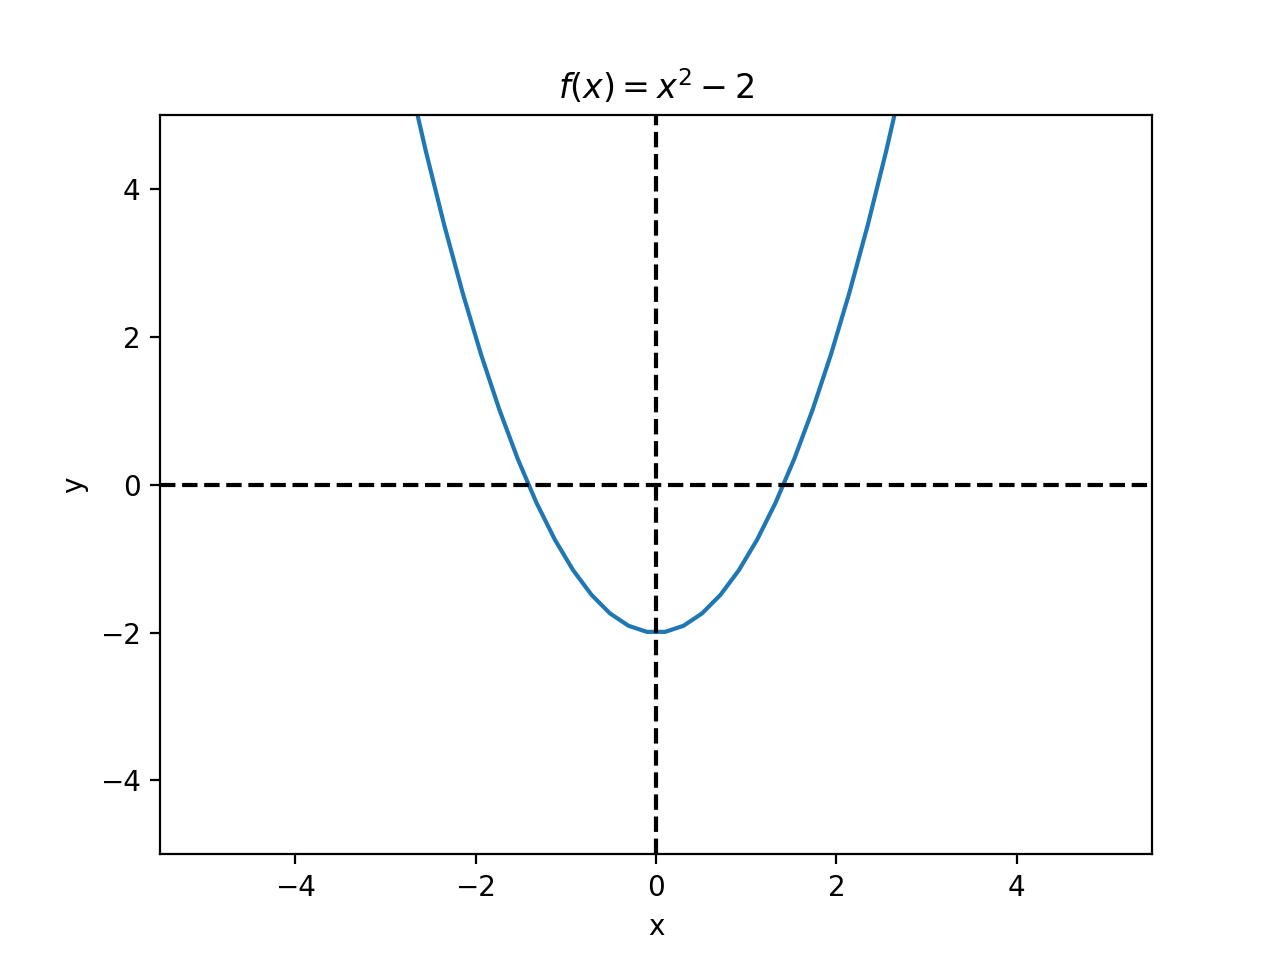

In [8]:
def f(x):
    return x**2 -2 #Test function
%matplotlib notebook
import numpy as np
import pylab as plt #Plot the function to see the interval for which a root is known to exist
x=plt.linspace(-5,5,50)
plt.plot(x,f(x))
plt.ylim(-5,5)
plt.axhline(y=0, color='k',linestyle='dashed')
plt.axvline(x=0, color='k',linestyle='dashed')
plt.title("$f(x)=x^2-2$")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

In [9]:
bounds=(-3,0.1) #Given bounds (a root is known to exist in this interval)
a,b=bounds
print("original bounds: ",bounds)
print("after one iteration, the bounds are: ",bisection_step(f,bounds))

count=0
while abs(a-b)>10**(-8): #Successive iterations of the bisection step until the f(a) and f(b) agree to 8 d.p.
    a, b = bisection_step(f, (a, b)) 
    count+=1
print("Accurate to 8 d.p. bounds: ({:10.9f}  {:10.9f})  Error= {:10.9f}   Taken {:2}  Iterations ".format(a, b, a-b,count))


original bounds:  (-3, 0.1)
after one iteration, the bounds are:  (-1.45, 0.1)
Accurate to 8 d.p. bounds: (-1.414213564  -1.414213558)  Error= -0.000000006   Taken 29  Iterations 


The results shown above emphasise a few important implications of the Bisection Method. Firstly, the bisection method requires the user to specify an interval where a root is known to exist, otherwise it will NOT converge to a root since $f(a)\cdot f(b)>0$, i.e. there isn't a root on the iterval $[a,b]$. Secondly, because every iteration is done by halving each boundary value, the convergence to a root within an acceptable accuracy is slow (29 iterations in this case) and the computed error is at most $ \frac{b-a}{2^{n-1}} $ [1]. One important advantage of the bisection method is that it does not require to evaluate the derivative of $f(x)$ or have any prior knowledge of $f'(x)$. To emphasise the importance of $f(x)$ being continuous, let $g(x)=tan(x)$

<IPython.core.display.Javascript object>


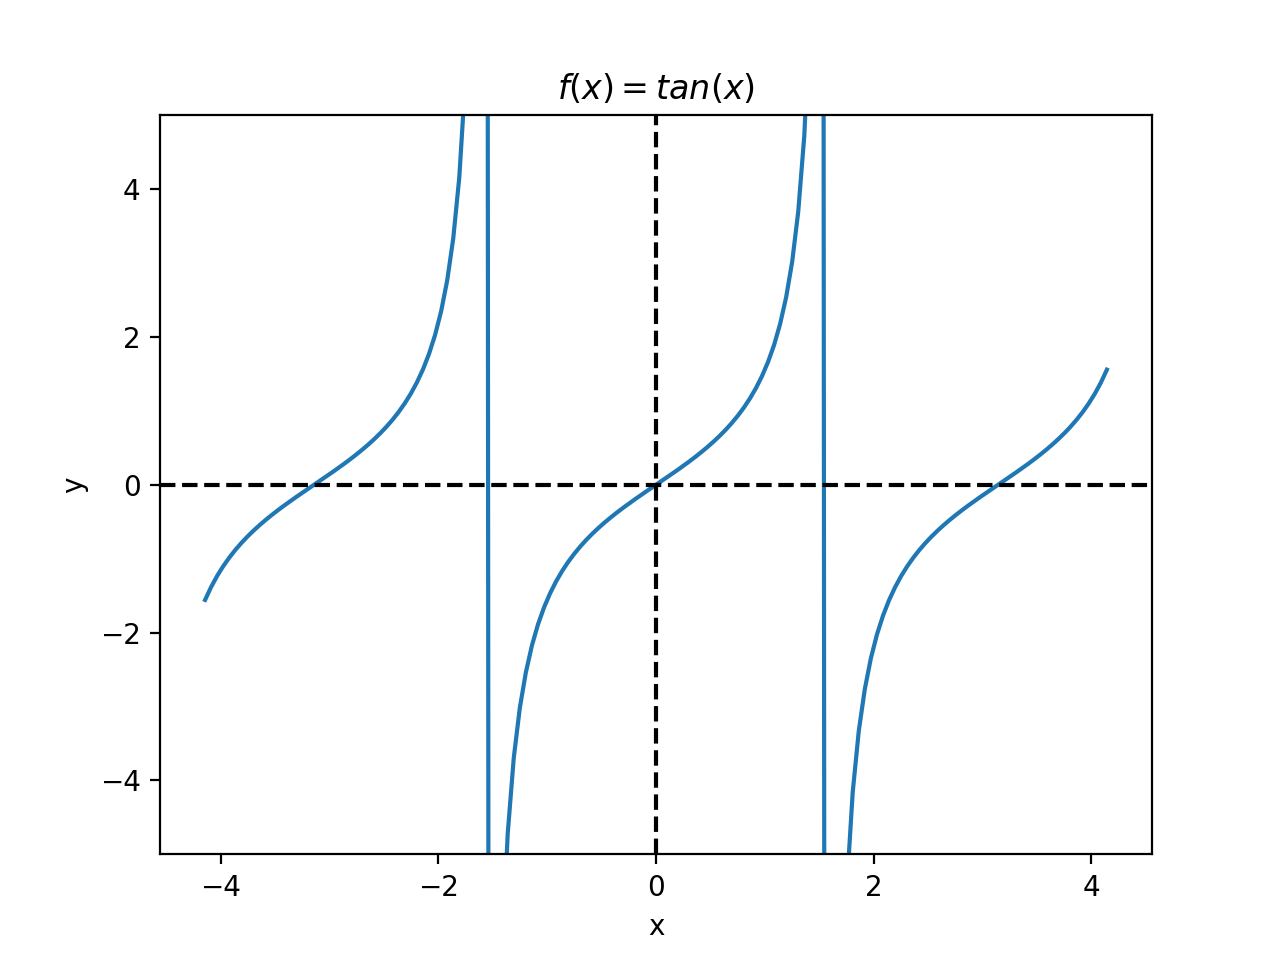

In [10]:
def g(x):
    return np.tan(x)
x=plt.linspace(-np.pi-1,np.pi+1,150)
plt.plot(x,g(x))
plt.ylim(-5,5)
plt.axhline(y=0, color='k',linestyle='dashed')
plt.axvline(x=0, color='k',linestyle='dashed')
plt.title("$f(x)=tan(x)$")
plt.ylabel("y")
plt.xlabel("x")
plt.show()

On the graph above we can see that, although $tan(x)$ is asymptotic at $x=\frac{\pi}{2}$, numpy shows $f(x)$ as being continuos, forcing a 'solution' to be found at $x=\frac{\pi}{2}$, which is verified below by the bisection method. Also, knowing that $f(0.1)\cdot f(0.3)>0$ we should expect the bisection method to run until both bounds are almost identical to one of the original bounds. This can be solved by introducing 'tolerance' statement added to the while loop below.

In [11]:
bounds2=(np.pi/2 - 0.4,np.pi/2+0.4) #note the selection of the bounds
a,b=bounds2
a1,b1=bounds2
count2=0
while abs(a-b)>10**(-8):
    a, b = bisection_step(g, (a, b)) 
    count2+=1
print("'fake' solution: ({:10.9f}  {:10.9f})  Error= {:10.9f} {:10} Iterations ".format(a, b, a-b,count2))
if abs(b1-a)==abs(b-a):
    print("No roots on the interval", bounds2)
if abs(a1-b)==abs(a-b):
    print("No roots on the interval", bounds2)


bounds3=(0.1,0.3)
a,b=bounds3
a1,b1=bounds3 #Keep the bounds unchanged for later
count3=0
while abs(a-b)>10**(-8):
    a, b = bisection_step(g, (a, b)) 
    count3+=1
if abs(b1-a)==abs(b-a): #Check whether one of bounds is almost identical to one of the original bounds, i.e there is
    print("No roots on the interval", bounds3)       #no root for the interval specified
if abs(a1-b)==abs(a-b):
    print("No roots on the interval", bounds3)


'fake' solution: (1.570796327  1.570796333)  Error= -0.000000006         27 Iterations 
No roots on the interval (0.1, 0.3)


In [12]:
#Finding an actual solution to tan(x) e.g. x=0
bounds4=(-0.15,0.45)
a,b=bounds4
a1,b1=bounds4
count4=0
while abs(a-b)>10**(-8):
    a, b = bisection_step(g, (a, b)) 
    count4+=1
if abs(b1-a)==abs(b-a):
    print("No roots on the interval", bounds4)   
print("Actual solution to tan(x): ({:10.9f}  {:10.9f})  Error= {:10.9f} {:10} Iterations ".format(a, b, a-b,count4))

bounds5=(-np.pi-0.2,np.pi+0.23)
a,b=bounds5
a1,b1=bounds5
count5=0
while abs(a-b)>10**(-8):
    a, b = bisection_step(g, (a, b)) 
    count5+=1
if abs(b1-a)==abs(b-a):
    print("No roots on the interval", bounds4)   
print("Actual solution to tan(x): ({:10.9f}  {:10.9f})  Error= {:10.9f} {:10} Iterations ".format(a, b, a-b,count5))

Actual solution to tan(x): (-0.000000009  0.000000000)  Error= -0.000000009         26 Iterations 
Actual solution to tan(x): (-3.141592658  -3.141592652)  Error= -0.000000006         30 Iterations 


The code above shows how graphing (careful selection of the interval) is extremely important for the bisection method for functions that have vertical asymptotes. Also, it is important to note the choice for $bounds4$ and $bounds5$. If the the root of the funciton is exactly at the middle of the interval, the bisection method will not work due to subtractive cancellation but this can be avoided by making the bounds slightly asymmetrical w.r.t a known solution, as shown above.

### Regula Falsi Method

The Regula Falsi method assumes that $f(x)$ is continuous in the interval $[a,b]$ and works by evaluating the line joining $f(a)$ and $f(b)$ provided $f(a)\cdot f(b)<0$ such that the line will interect the $x$ axis at point $m=\frac{a\cdot f(b)-b\cdot f(a)}{f(b)-f(a)}$ . Then, set $a$ or $b$ to $m$ s.t. $f(a)\cdot f(b)<0$ still. This process is then repeated until $f(a)\approx f(b)$ like in the Bisection Method. The code below ilustrates this.

In [13]:
def regula_falsi_step(f, bounds):
    a, b = bounds
    m=((a*f(b)-b*f(a))/(f(b)-f(a))) 
    if (f(a)*f(m))<0:
        return (a,m)
    else:
        return (m,b)

In [14]:
bounds=(-1.1,2)
a,b=bounds
print("Single step of Regula Falsi for f(x)",regula_falsi_step(f,bounds))

Single step of Regula Falsi for f(x) (-0.2222222222222224, 2)


In [15]:
count=0
while abs(f(b))>10**(-8) and abs(f(a))>10**(-8): #value of sqrt(2): 1.41421356237
    a, b = regula_falsi_step(f, (a, b))
    count+=1
print("Regular Falsi results for f(x)=x^2 -4")
print("{:15.8f}  {:15.8f} {:10} Iterations ".format(a, b,count))

Regular Falsi results for f(x)=x^2 -4
     1.41421356       2.00000000         13 Iterations 


We can see that for a 'normal'and 'well behaved' polynomial the Regula Falsi method takes roughly half of the iterations to complete as the Bisection Method. However, the limits have to be taken with care as it is important to note that if $f(a)=f(b)$ then the denominator is 0 so the regula falsi does not work. We can fix this with an if statement which will add a very small amount to either $f(a)$ or $f(b)$ if the denominator is equal to zero as shown below.

In [16]:
def regula_falsi_step2(f, bounds):
    a, b = bounds
    denom=f(b)-f(a)
    c=0
    if denom==0: #If we encounter that the denom is equal to zero, add a very small amount to the value of f(b)
        c=f(b)+1e5
    m=((a*f(b)-b*f(a))/(c-f(a))) 
    if (f(a)*f(m))<0:
        return (a,m)
    else:
        return (m,b)


In [17]:
print("Error mentioned before: ",regula_falsi_step(f,(-2,2)))

ZeroDivisionError: division by zero

In [18]:
print("Error solved: ",regula_falsi_step2(f,(-2.1,2)), "Now we can use the Regula Falsi method even if f(a)=f(b)")
count=0
while abs(f(b))>10**(-8) and abs(f(a))>10**(-8): #1.41421356237
    a, b = regula_falsi_step2(g, (f, b))
    count+=1
print("Updated Falsi results")
print("{:15.8f}  {:15.8f} ".format(a, b,))

Error solved:  (3.742738589211618, 2) Now we can use the Regula Falsi method even if f(a)=f(b)
Updated Falsi results
     1.41421356       2.00000000 


Let us now consider how the Regula Falsi method will work for a function like $h(x)=x\cdot e^{-x}$. The reason for choosing this function is that it is both asymptotic and only has a root at x=0. This will allow us to showcase other problems that may arise for the methods covered so far.

<IPython.core.display.Javascript object>


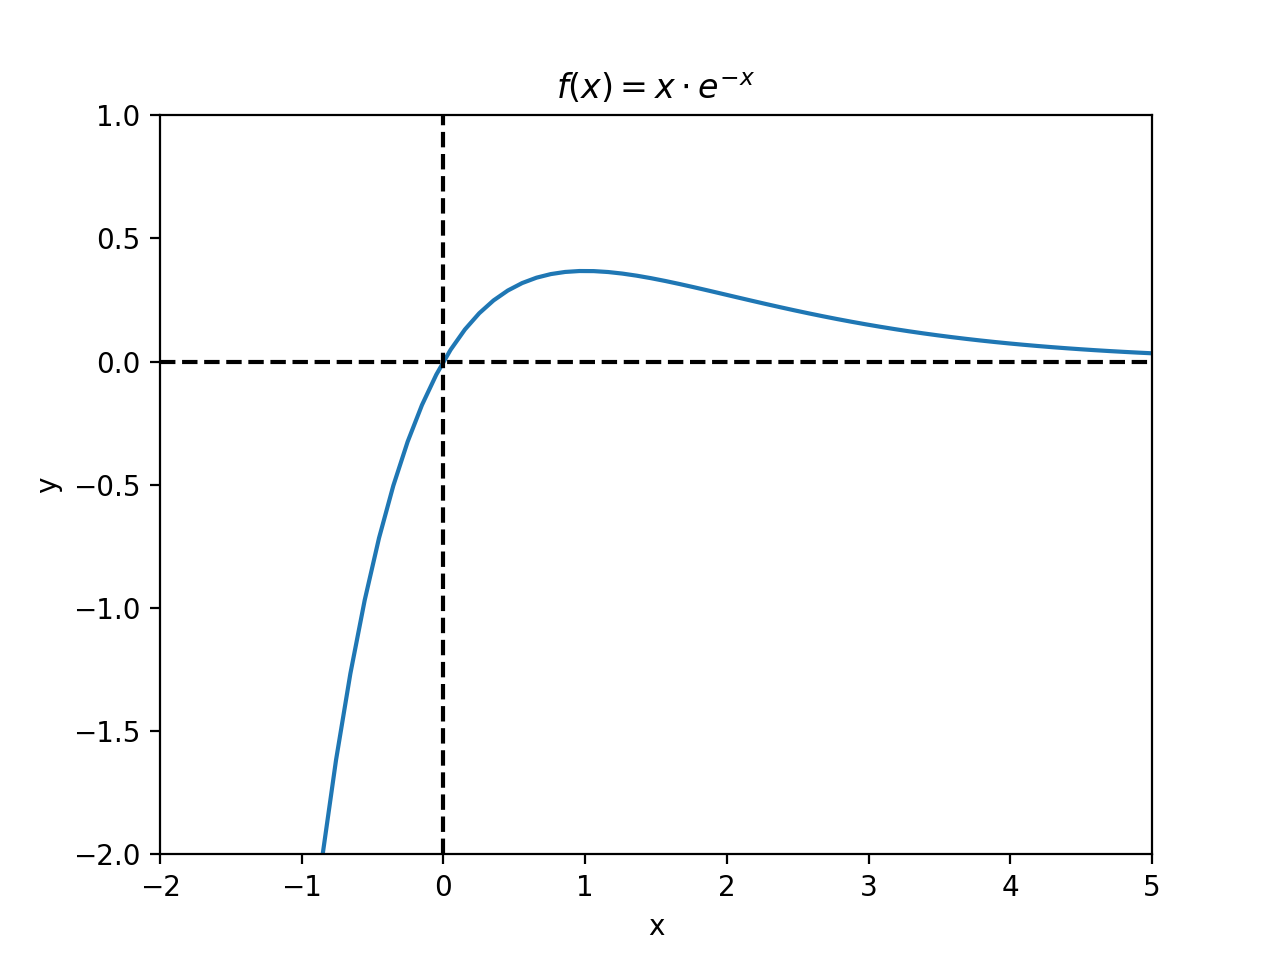

In [20]:
def h(x):
    return (x*np.e**(-x))

x=plt.linspace(-5,5,100)
plt.plot(x,h(x))
plt.ylim(-2,1)
plt.xlim(-2,5)
plt.axhline(y=0, color='k',linestyle='dashed')
plt.axvline(x=0, color='k',linestyle='dashed')
plt.title("$f(x)=x\cdot e^{-x}$")
plt.ylabel("y")
plt.xlabel("x")
plt.show()


A few problems should immediately come to mind when looking at this graph. If using the Regula Falasi method, because it calculates the intersect of the line joining $h(a)$ and $h(b)$, for $x>1$ this line will always intersect further and further to the right after successive iterations so Regula Falsi will not converge to the known solution. This is ilustrated below, where the values for $a$ and $b$ are both greater than 1. It is worth noting that if $f(a)=f(b)$ the line will be straight and will not intersect the x-axis, thus Regula Falsi will not work.

In [21]:
bounds2=(1,2)
a,b=bounds2
Iter=0
for i in range(100): #Manually perform 100 iterations of the Regula Falsi step
    a, b = regula_falsi_step(h, (a, b))
    Iter+=1
    if Iter%10==0: #Print the values every 10 Iterations :)
        print("{:15.8f}  {:15.8f} Iteration {}".format(a, b,Iter))
print("We can see how the value of the root diverges for the reasons explained previously")
        
#Now we show that Regula Falsi converges very fast for a suitable range
sensible_bounds=(-2,0.9)
a,b=sensible_bounds
count=0
while abs(h(b))>10**(-8) and abs(h(a))>10**(-8):
    a, b = regula_falsi_step(h, (a, b))
    count+=1
print("Regula Falsi if given sensible bounds")
print("{:10.8f}  {:10.8f} Iteration {}".format(a, b,count))

     6.99947051       2.00000000 Iteration 10
     7.89875332       2.00000000 Iteration 20
     8.43788359       2.00000000 Iteration 30
     8.82183692       2.00000000 Iteration 40
     9.11934881       2.00000000 Iteration 50
     9.36183459       2.00000000 Iteration 60
     9.56626064       2.00000000 Iteration 70
     9.74281986       2.00000000 Iteration 80
     9.89810922       2.00000000 Iteration 90
    10.03664051       2.00000000 Iteration 100
We can see how the value of the root diverges for the reasons explained previously
Regula Falsi if given sensible bounds
-2.00000000  0.00000001 Iteration 131


Although the above results look very promissing, it is very important to highlight that it took **131** iterations! A careful evaluation of this surprising result shows that although $b$ approaches 0 very fast, looking closely at the terms that give the value for $m$ in Regula Falsi, we can see that the numerator will experience some subtractive cancellation errors, until randomly converging to a value within our tolerance level.

However, for the Bisection Method, because $h(a)\cdot h(b)<0$ for all $a<0<b$ then given a suitable lower bound, the Bisection method will be a very good at converging to a senible range to find the root at $x=0$.

In [22]:
bounds1=(-15,15) #Note how we can specify a large interval since h(a)*h(b)<0 for all a<0 and b>0
a,b=bounds
Tot=0
while abs(a-b)>10**(-8):
    a, b = bisection_step(h, (a, b)) 
    Tot+=1
print("Accurate to 8 d.p. bounds: ({:10.9f}  {:10.9f})  Error= {:10.9f}   Taken {:2}  Iterations "
      .format(a, b, a-b,Tot))


Accurate to 8 d.p. bounds: (-0.000000004  0.000000002)  Error= -0.000000006   Taken 29  Iterations 


### Newton-Raphson Method

We have seen so far the importance of graphing the function before specifying an interval. The Regula Falsi method proved to converge must faster than the Bisection method (in general) as it found the intercept of the **line connecting** $f(a)$ and $f(b)$ instead of halfving the distance between them each time. This allowed us to introduce the idea of the slope. We know that the the slope of a fuction at a point is given by its derivative. The formal definition of the derivative involves taking the limit as the step size $h$ approaches zero. However, for sufficiently small $h$ the following is true: 

$$f'(x)=\lim_{x \rightarrow 0} \frac{f(x + h) - f(x)}{h} \approx \frac{f(x + h) - f(x)}{h}$$

It is important to mention that for VERY small $h$ the numerator will experience problems with substractive cancellation, so we evaluate the trade-off between step size values and accuracy in the evaluation of errors section. Here it is worth noting that the error in the value calculated for $f'(x)$ is porportional to h. This error can be decreased as explained in lectures and subtractive cancellation will be avoided by using the Imaginary Step algorithm, which was left as an extension exercise. Because the Newton-Raphson method requires knowledge of the derivative, we will use the Imaginary Step algorithm (left as an extension during the Labs) to calculate the derivative and then use the Newton-Raphson method.

In [23]:
def newton_step(f,x0):
    fpx0=IS(f,x0)
    z=(x0-(f(x0)/fpx0))
    o=(z+(f(x0)/fpx0)) 
    return z, o

def IS(f,x):
    h=1e-7  #IMPORTANT TO NOTE THAT THE VALUE OF H HAS BEEN SELECTED AFTER DOING THE ERROR ANALYSIS,
            #AS THIS IS THE OPTIMAL VALUE FOR H (Between absolute error and computation time) IN THE IMAGINARY STEP 
            #METHOD, SEE THE EVALUATION OF ERROS FIGURE FOR A BETER EXPLANATION
    return np.imag(f(x + 1j*h))/h

In [27]:
x0=1
count=0
print("Single Imaginary Step result: ",IS(g,x0))
print("One Newton Step where f'(x) is calculated with IS: ",newton_step(g,x0))

bounds=(0.1,2)
z,o=bounds
Tot=0
y=1
while abs(z-o)>1e-8:
    z, o =newton_step(f,y)
    y=z
    Tot+=1
print("Accurate to 8 d.p. bounds: ({:10.9f}  {:10.9f})  Error= {:10.9f}   Taken {:2}  Iterations "
      .format(y,o, z-o,Tot))


Single Imaginary Step result:  3.42551882081
One Newton Step where f'(x) is calculated with IS:  (0.5453512865871466, 1.0)
Accurate to 8 d.p. bounds: (1.414213562  1.414213562)  Error= -0.000000000   Taken  5  Iterations 


In [5]:
#There should be a Markdown cell under this one

We can see that the Newton-Raphson method converges to the solution to 8 d.p. in just 4 Iterations! This is considerably faster than the Bisection method, and slighly faster than the Regula Falsi method, as it uses the definition of the derivative at a point instead of the line between two points. We explained previously how the Regula Falsi method would work and not work for a function like $h(x)=x\cdot e^{-x}$. The same argument can be used to justify the reliability of Newton Raphson. For horizontal asymptotes, $h'(x>1)<0$, i.e. will follow the asymptote until $\infty$. With this in mind, it can be seen how increadibly important it is to graph the function we are trying to find solutions for, as specifying a suitable range will allow us to calculate the solutions with numerically faster methods. Conversely, we can always use the bisection method for 'large' intervals, and see whether or not a root is found there. A more detailed explanation of this is discussed under Hybrid Methods.

In [28]:
#Git not uploading the above markdown cell

# Discussion

### Evaluation of errors calculating the numerical value of derivative needed for the Newton-Raphson method

In order to emphasize the superiority of the Imaginary Step method over the ones covered in lectures, it is convenient to plot the absolute error against the step size as we did in Lab 5, but this time including the Imaginary Step.

In [29]:
def FD(f, x, h): #FORWARD DIFFERENCE
    return (f(x+h)-f(x))/h
def CD(f,x,h): #CENTRAL DIFFERENCE
    return (f(x+0.5*h)-f(x-0.5*h))/h
def ED(f,x,h): #EXTRAPOLATE DIFFERENCE
    return (1/3)*(4*CD(f,x,0.5*h)-CD(f,x,h))

<IPython.core.display.Javascript object>


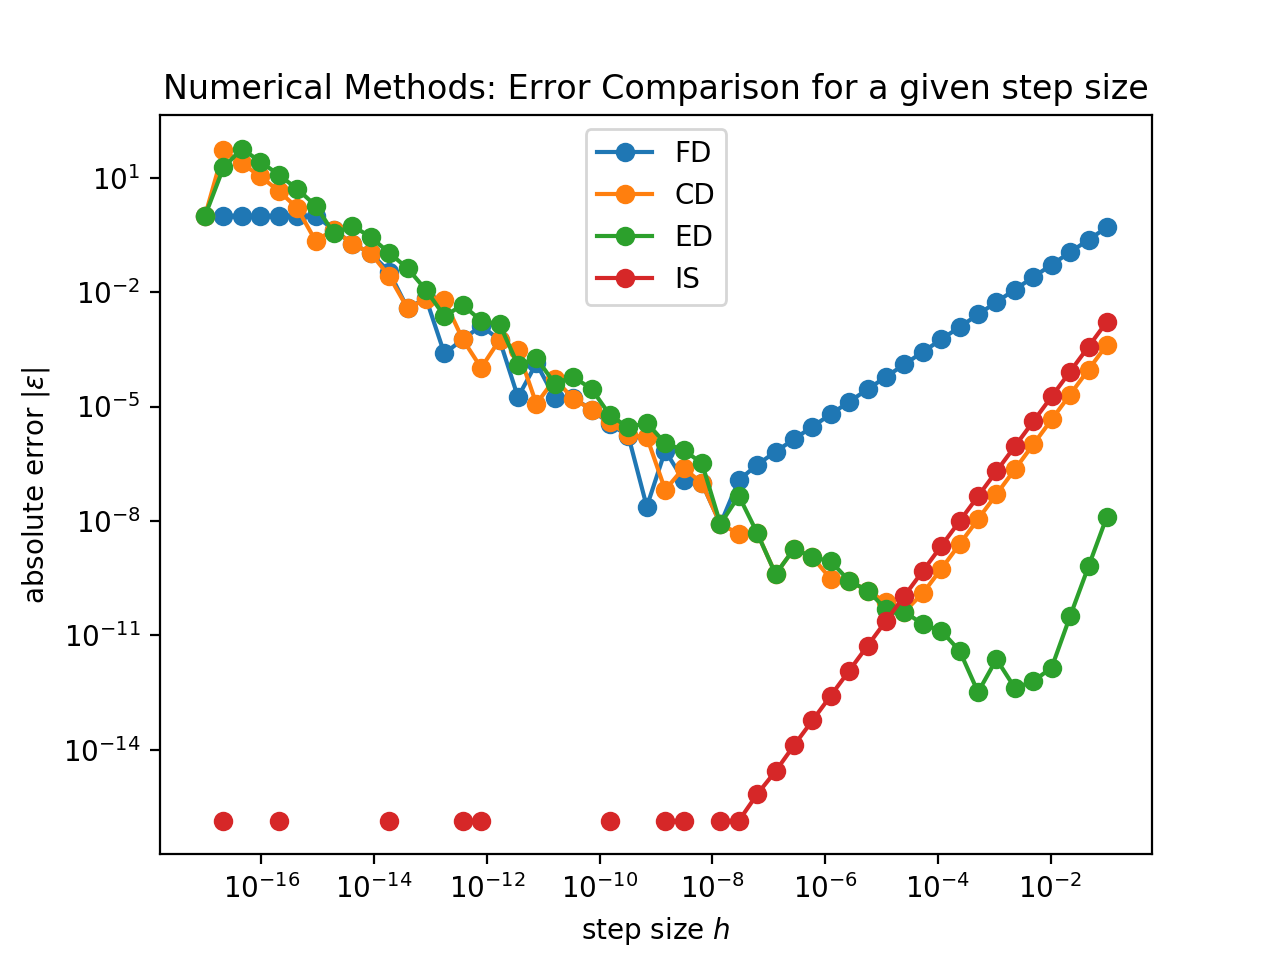

In [31]:
from pylab import cos, sin, exp, logspace, loglog, xlabel, ylabel, title, legend
%matplotlib notebook
def test_f(x):
    return cos(x)

def IS(f,x,h):
    return np.imag(f(x + 1j*h))/h
x0 = 0.1
fx0p = - sin(x0)

hh = logspace(-1, -17, 50)

fd_errors = []
cd_errors = []
ed_errors = []
is_errors = []


for h in hh:
    fd_estimate = FD(test_f,x0,h)
    cd_estimate = CD(test_f,x0,h)
    ed_estimate = ED(test_f,x0,h)
    is_estimate = IS(test_f,x0,h)
     
    fd_error = (fd_estimate - fx0p)/fx0p
    cd_error = (cd_estimate - fx0p)/fx0p
    ed_error = (ed_estimate - fx0p)/fx0p
    is_error = (is_estimate - fx0p)/fx0p
  
    fd_errors.append(abs(fd_error))
    cd_errors.append(abs(cd_error))
    ed_errors.append(abs(ed_error))
    is_errors.append(abs(is_error))

loglog(hh, fd_errors, 'o-', label="FD")
loglog(hh, cd_errors, 'o-', label="CD")
loglog(hh, ed_errors, 'o-', label="ED")
loglog(hh, is_errors, 'o-', label="IS")
xlabel('step size $h$')
ylabel('absolute error $|\epsilon|$')
title("Numerical Methods: Error Comparison for a given step size")
legend()

Considering the error porportionality for the FD, CD and ED methods, it should come as no surprise that ED has the lowest absolute error and although it converges very rapidly to the numerical value of the derivative there is a trade-off to be made between accuracy and computing time, as the ED method is much more computer intensive. There are a few key points to note from this graph, notably the point where the step size for FD, CD and ED becomes so small that the errors due to subtractive cancellation overtake (LHS ascent) [2]. The optimal step size $h$ for the FD, CD and ED methods is found where the absolute error is the lowest. Due to the fact that there is no subtraction in the IS method, we can see that subtractive cancellation plays no role, regardless of the step size used and thus, the IS curve does not increase as $h$ decreases. Therefore, whenever the function in question is analytic the IS method will be used with a step size of $h=\approx 10^{-8}$ as there is no significant increase in absolute error precision, and will be computationally reasonable to perform. This is also the range where the FD and CD methods start to experience subtractive cancellation errors.

### Accelerated Convergence

During the tutorials, we found how to express functions as a series ($sin(x)$ during the turorial and $sec(x)$ during the quiz). Thankfully, mathematicians have gone to great lengths to evaluate the speed at which a series converges, and how to accelerate its convergence, called "Series Acceleration". There are several methods which deal with different series, as well as initial conditions. Some methods which would be worth exploring in future work include, Aitken's $d^2$ process and Euler's method for alternating series amonst others mentioned in [3].

### Hybrid Methods

As well as accelerating the convergance through the use of advanced series convergance manipulations, we can build a combination of the methods studied to optimize computational demand and time. For example, we have seen how the Bisection method is better suited at finding a reasonable range for a large initial interval, whilst the Regula Falsi and Newton-Raphson methods were better suited once the interval was already close to the numerical value. Therefore, we can build a Hybrid method that would look at the value of the change in interval range at every step of the iteration, and choose either the Bisection or the Newton-Raphson method accordingly. Thus, for a large interval range, it would initially use the Bisection method, as it would reduce the interval range by half, but as the interval approaches the value of the root, it would then perform the Newton-Raphson method because its quadratic convergence would be superior than the linear convergance of the Bisection method [1]. 

This idea was first introduce by Dekker but then was more sophisitcally implemented in Brent's method, which combines the Bisection method, Regula Falsi and inverse quadratic interpolation, which the reader is strongly encouraged to investigate [5]. However, Brent's method can give a distant zero, specially when two roots are nearly equal as we saw in Lab 4 with $k(x)=x^4- 8x^3 + 22x^2 - 24x + 9$, whereas the Davidenko-Broyden method is more efficient for this particular problem [6]. If a function is known to be vertically asymptotic at a particular value, it would be a good idea to specify this range so the root finding algorithm does not look within this range.

### Inverse functions

It is worth noting that for trigonometric functions with periodic roots, such as $sin(x)$ and $cos(x)$ , their inverse function is asymptotic where these roots are found i.e. analysing the gradient of the inverse function will tell us that a root of $f(x)$ is highly likely to be found where there are sharp peaks in the slope of $f^-(x)$. This idea is particularly useful considering any function can be expressed as the sum of sin and cosine terms using a Fourier Series. Nevertheless, this can be applied to regular functions like $g(x)=2x^2 - e^x$. The graph below illustrates this concept.

<IPython.core.display.Javascript object>


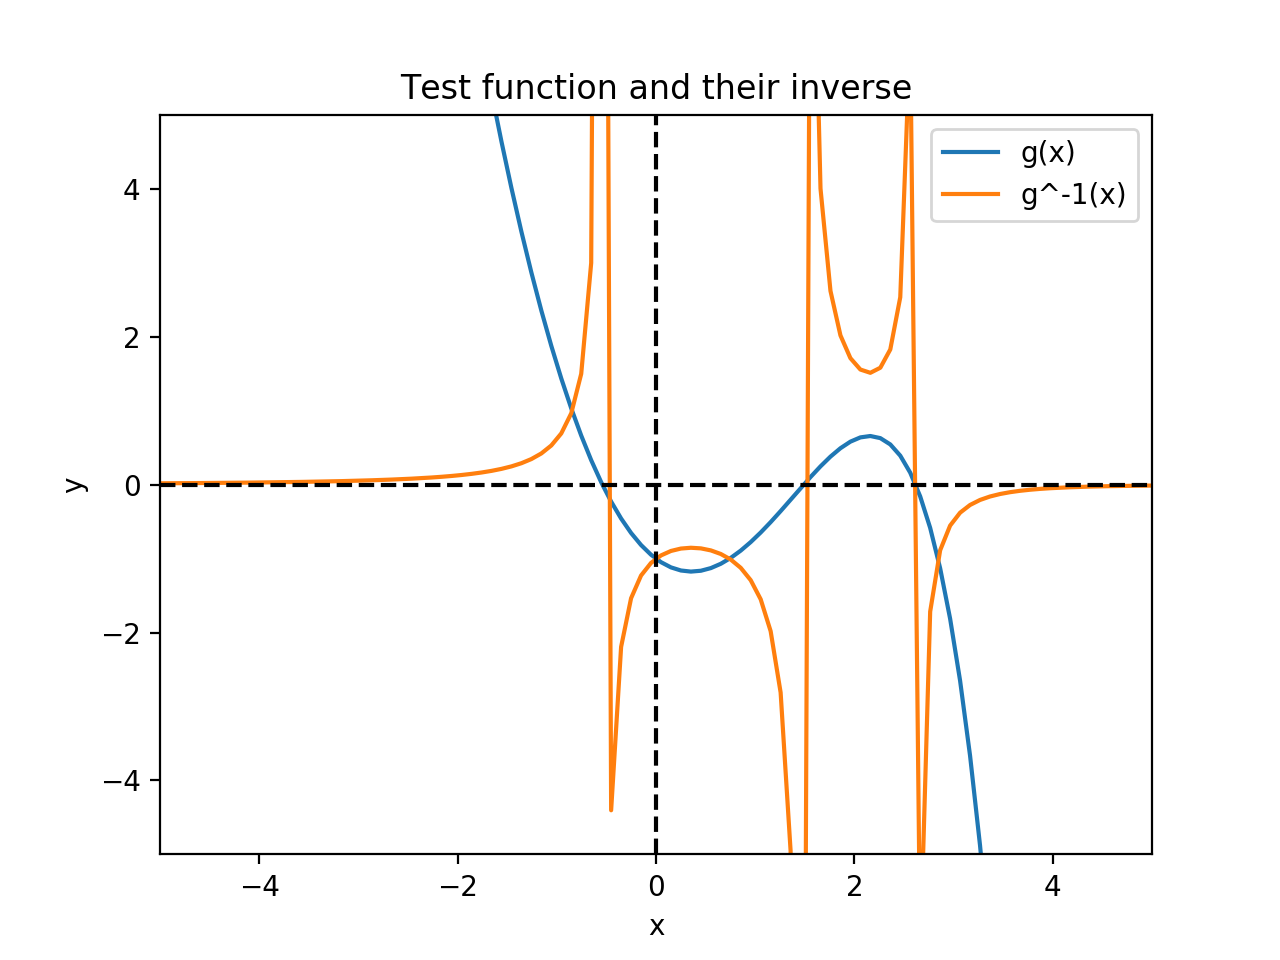

In [32]:
x=plt.linspace(-10,10,200)
def arcsin(x):
    return (np.sin(x)**(-1))
def g(x):
    return (2*(x**2)-np.e**x)
def g_inv(x):
    return 1/g(x)
#plt.plot(x,np.sin(x), label = "sin(x)")
#plt.plot(x,arcsin(x), label = "arcsin(x)")
plt.plot(x,g(x), label = "g(x)")
plt.plot(x,g_inv(x), label = "g^-1(x)")
plt.axhline(y=0, color='k',linestyle='dashed')
plt.axvline(x=0, color='k',linestyle='dashed')
plt.title("Test function and their inverse")
plt.ylabel("y")
plt.ylim(-5,5)
plt.xlim(-5,5)
plt.xlabel("x")
plt.legend()
plt.show()


We could also exploit the property that where $f(a)=0$ (root) then $ f^-1(a)=\pm \infty$. Therefore, by making an if statement to return values for which $f^-1(a)>>>f(a)$ and other conditions expressed below, we can find approximate roots for our function, which can then be evaluated more precisely with the methods used previously.

In [33]:
bounds=(-2,4)
a,b=bounds
x=plt.linspace(a,b,1000)
T=0.01
p=[] #LIST WHERE THE ROOTS HAVE BEEN FOUND
for elem in x:
    if abs(g(elem))<T:
        #print(elem,g(elem),g_inv(elem))
        if abs(g_inv(elem)-g(elem))>100:
            p.append(elem)
print("Original list of roots: ",p)
for i in range(0,len(p)-2):
    if abs(p[i]-p[i+1])<1e-2:
        del p[i] #DELETING REPEATED ROOTS
print("After deleting repeated roots: ", p)

bounds=(-0.6,1)
a,b=bounds
count=0
while abs(a-b)>10**(-8): #Successive iterations of the bisection step until the f(a) and f(b) agree to 8 d.p.
    a, b = bisection_step(g, (a, b)) 
    count+=1
print("Bisection results ({:10.9f}  {:10.9f})   Taken {:2}  Iterations ".format(a, b,count))
bounds=(-1,0.1)
a,b=bounds
count=0
while abs(g(b))>10**(-8) and abs(g(a))>10**(-8): #1.41421356237
    a, b = regula_falsi_step(g, (a, b))
    count+=1
print("Regula Falsi Results: {:15.8f}  {:15.8f} {:10} Iterations ".format(a, b,count))
print("Therefore our approximate root gave a good interval for other methods to use")


Original list of roots:  [-0.54054054054054057, 1.4834834834834836, 1.4894894894894897, 2.6186186186186182]
After deleting repeated roots:  [-0.54054054054054057, 1.4894894894894897, 2.6186186186186182]
Bisection results (-0.539835280  -0.539835274)   Taken 28  Iterations 
Regula Falsi Results:     -1.00000000      -0.53983528         14 Iterations 
Therefore our approximate root gave a good interval for other methods to use


The "inverse function method" has the great advantage of finding multiple roots at once, for a given range and has the potential to be a good estimate for where the roots are. This, in combination with the Newton-Raphson method could work very well. It is important to note that there are limitations to the precision with which we could find two distinct roots. Given the way numbers are stored, if two roots $x_1$ and $x_2$ s.t. $x_1+x_2≤10^{-320}$ there is no way to tell them appart. Also, extra care should be taken when using the methods above, since we usually specified a tolerance threshold for the difference between the two bounds, i.e. limit to the precision with which we are trying to find the roots. It can be the case, as we explored in with the $4^{th}$ degrre polynomial in Lab4 that two roots $x_1$ and $x_2$ are so close that $| x_1-x_2|≤1e-8$ s.t. the roots are two close for our tolerance values.

### Final Comments

The study of numerical methods in computation has proven to be a challenging but interesting endeavour. We explored the reliability of the Bisection method, at the expense of computational efficiency. Although the Newton-Raphson method converged quickly, it required the bounds to be close to a known root and does require some knowledge on the derivative of the function. Provided the function is analytical and having previously graphed the function, it is sensible to use the Newton-Raphson method in combination with the Imaginary Step algorithm with a step size of $h\approx 10^{-8}$. However, for quick whilst still reliable solutions, the Regula Falsi method is very efficient as no prior knowledge of the behaviour of the derivative is requiered and Regula Falsi converges almost as fast as the Newton-Rhapson method. Regula Falsi and Newton-Raphson should be used with care, as horizontal asymptotes and subtractive cancellation errors when calculating the intersect of the line can have very undesirable consequences as shown with the function $f(x)=2x^2\cdot e^{-x}$. For this reason, we strongly suggest the use of Hybrid methods, specially Brent's method, as they have been carefully evaluated and tested already as well as provide reliable roots to functions.

### References

[1] Cheney, W. and Kincaid, D. (n.d.). Numerical Mathematics and Computing. 4th ed. Gary W. Ostedt.

[2] Martins, J., Sturdza, P. and Alonso, J. (2003). The Complex-Step Derivative Approximation. Vol.29. No.3. ACM Transactions on Mathematical Software

[3] Sebah, P. and Gourdon, X. (2002). Convergence acceleration of series.

[4] Ehiwario, J.C., Aghamie, S.O (2014). Comparative Study of Bisection, Newton-Raphson and Secant
Methods of Root- Finding Problems. IOSR Journal of Engineering. ISSN (e): 2250-3021. Vol. 04

[5] Brent, R.P. (1971) An algorithm with guaranteed convergence for finding a zero of aa function. The Computer Journal. Vol.14. N.4

[6] Swift, A. Lindfield, G.R. (1977) Comparison of a continuation method with Brent's method for the numerical solution of a single nonlinear equation.  The Computer Journal. Vol.21. N.4

In [34]:
def word_count(notebook):
    """Prints the word count in Markdown cells of the file named notebook."""
    with open(notebook, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
    word_count = 0
    total_word_count = 0
    for cell in nb['cells']:
        if cell['cell_type'] == "markdown":
            lines = cell['source'].split('\n')
            for line in lines:
                if len(line) > 0 and line[0] == '#':
                    print(word_count)
                    total_word_count += word_count
                    word_count = 0
                    print(line.strip(), end=" ==> ")
                else:
                    word_count += len(line.lstrip().split(' '))
    print(word_count)
    print("Total ==> ", total_word_count)


In [35]:
word_count("Report1.ipynb")

NameError: name 'nbformat' is not defined